### K-Means algorithm 

       

### Clustering Optimization Objective

### $c^{(i)} = index\;of\;cluster\;\left(1,2,3...,K\right)\;to\;which\;example\;x^{(i)}\;is\;currently\;assigned$
### $\mu_k = cluster\;centroid\;k\;\left(\mu_k \in \mathbb{R^n}\right)$
### $\mu_{c^{(i)}} = cluster\;centroid\;of\;cluster\;to\;which\;example\;x^{(i)}\;has\;been\;assigned$

### Optimization objective:
 $J\left(c^{(i)},...c^{(m)},\mu_1,...,\mu_k\right) = \frac{1}{m}\sum\limits_{i=1}^{m}\|x^{(i)} - \mu_{c^{(i)}}\|^2$\
 $min\;J\left(c^{(i)},...c^{(m)},\mu_1,...,\mu_k\right)$

In [12]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
def findClosestCentroids(X, centroids):
    #Finding sample size
    m = np.shape(X)[0]
    
    #Getting cluster size
    K = np.shape(centroids)[0]
    
    #Initializing cluster array
    clusters = np.zeros((m, 1))
   
    #Getting sample size
    m = np.shape(X)[0]

    for i in range(0,m):
        #Initializing belonging cluster as 1
        clusterIdx = 0
        
        #Initializing the min-distance with the distance between x(i) and first-centroid
        minDistance = np.sum(np.square(X[i,:] - centroids[0,:]))
        
        #Iterating over each centroid to find the min-distance
        for j in range(1,K):
            distance = np.sum(np.square(X[i,:] - centroids[j,:]))
            if(distance < minDistance):
                minDistance = distance
                clusterIdx = j
                
        #Assigning the cluster value to a test-item       
        clusters[i] = clusterIdx

    return clusters


### Random initialization
### $Should\;have\;K<m$
### $Randomly\;pick\;K\;training\;examples\;$
### $Set\;\mu_1,\mu_2,...,\mu_k\;equal\;to\;these\;K\;examples.$
### $Compute\;cost\;function\;J\left(c^{(i)},...c^{(m)},\mu_1,...,\mu_k\right)$
### $Pick\;clustering\;that\;gives\;lowest\;cost$

### $Randomly\;initialize\;K\;cluster\;centroids\;\mu_1,\mu_2,\mu_3,...,\mu_k \in \mathbb{R}^{n}$ 
### $Repeate \{$
### $ for \;i = 1\;to\;m$
### $\;\;\;\;c^{(i)} := index(from \;1 \;to\; K)\;of\;cluster\;centroid\;closest\;to\;x^{(i)}$
          
### $for \;k = 1\;to\;K$
### $\;\;\;\;\mu_k := average(mean)\;of\;points\;assigned\;to\;cluster\;k$
### $\}$

In [37]:
def kmeans(X_, initialCentroids, maxIters):
    xDf  = X_.copy()
    X = X_.to_numpy()
    
    #Finding sample size and number of features
    m,n = np.shape(X)

    K = np.shape(initialCentroids)[0]
    
    clusters = np.zeros((m, 1))
    
    #Initializing centroidal history array
    centroidHistory = np.zeros((K*maxIters,np.shape(initialCentroids)[1]))
    
    centroidHistory[0:K,:] = initialCentroids

    #Running K-Means
    for i in range(1,maxIters):

        #Output progress
        print('K-Means iteration %d/%d...\n' % (i, maxIters))
        
        #For each example in X, assign it to the closest centroid
        clusters = findClosestCentroids(X, centroids)

        #Optionally, plot progress here
        plotProgresskMeans(xDf, centroidHistory, clusters, K, i)

        #Given the memberships, compute new centroids
        centroidHistory[K*i:K*(i+1),:] = computeCentroids(X, clusters, K)
 
    return centroids,clusters


In [60]:
def plotProgresskMeans(X, centroidHistory, clusters, K, maxIter):
    m = np.shape(centroids)[0]
    
    results = X.copy() 
    results['Clusters'] = clusters
    
    #Plot the result
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(results.iloc[:,0],results.iloc[:,1],c=results.iloc[:,2],cmap='rainbow',label='data')
    
    #Plot the centroids as black x's
    ax.scatter(centroidHistory[0:K*maxIter,0], centroidHistory[0:K*maxIter,1],marker='x',c='k')
    
    #Plotting progress line
    for i in range(0,K):
        ax.plot(centroidHistory[i:K*maxIter:3,0], centroidHistory[i:K*maxIter:3,1],c='k')

        
    #Title for the plot
    plt.title('Iteration number %d'% maxIter)
    plt.xlim(-180,180)
    plt.ylim(-90,90)
    plt.show()


In [61]:
def computeCentroids(X, clusters, K):
    #Finding sample size
    m = np.shape(X)[0]
    
    #Finding number of variables
    n = np.shape(X)[1]
    
    #Initializing centroids array
    centroids = np.zeros((K, n))

    for clusterNum in range(0,K):
        #Getting elements belonging to perticular cluster
        clusterEles = X[(np.ravel(clusters) == clusterNum)]
        
        #Getting no. of elements in the cluster
        nCluster = np.shape(clusterEles)[0]
        
        #Calculating mean of cluster elements to find clusterCentoid
        centroids[clusterNum, :] =  [(1/nCluster)*np.sum(clusterEles[:,0]),(1/nCluster)*np.sum(clusterEles[:,1])]
        
    return centroids

### Function to Plot the results

In [62]:
def plotRes(results):
    plt.scatter(results.iloc[:,0],results.iloc[:,1],c=results.iloc[:,2],cmap='rainbow')
    plt.xlim(-180,180)
    plt.ylim(-90,90)
    plt.show()

### Loading data

In [63]:
data = pd.read_csv('country_clusters.csv')
X = data[['Longitude','Latitude']]


### Plotting the data

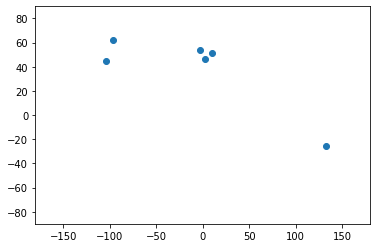

In [64]:
#Plotting data
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Finding the closest centroids.

In [65]:
K = 3 
initialCentroids = np.matrix([[10,-20] ,[-50 ,40],[0, 40]])


print('Finding closest centroids...')
clusterArray = findClosestCentroids(X.to_numpy(), initialCentroids)



Finding closest centroids...


In [66]:
results = X.copy() 
results['Clusters'] = clusterArray
results

,Longitude,Latitude,Clusters
0,-103.77,44.97,1.0
1,-96.80,62.40,1.0
2,2.40,46.75,2.0
3,-2.53,54.01,2.0
4,10.40,51.15,2.0
5,133.11,-25.45,0.0


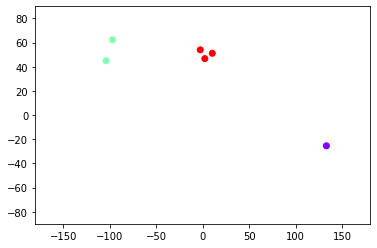

In [67]:
plotRes(results)

In [68]:
clusterEles = X[(np.ravel(clusterArray) == 2)]
clusterEles

,Longitude,Latitude
2,2.40,46.75
3,-2.53,54.01
4,10.40,51.15


### ===================== Compute Means =========================


In [69]:

print('Computing centroids means....\n')

#Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X.to_numpy(), clusterArray, K)

print('Centroids computed after initial finding of closest centroids: \n')
print(centroids)


Computing centroids means....

Centroids computed after initial finding of closest centroids: 

[[ 133.11        -25.45      ]
 [-100.285        53.685     ]
 [   3.42333333   50.63666667]]



### =================== K-Means Clustering ======================


Running K-Means clustering on example dataset...

K-Means iteration 1/5...



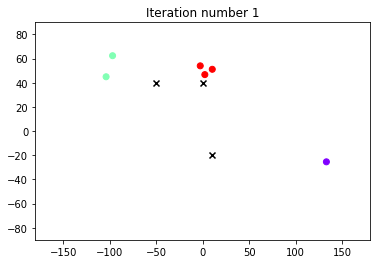

K-Means iteration 2/5...



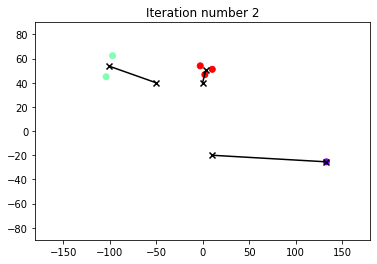

K-Means iteration 3/5...



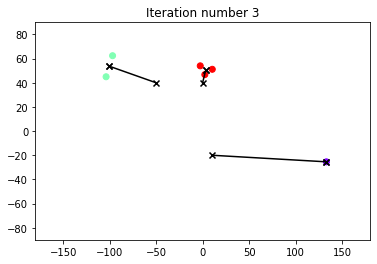

K-Means iteration 4/5...



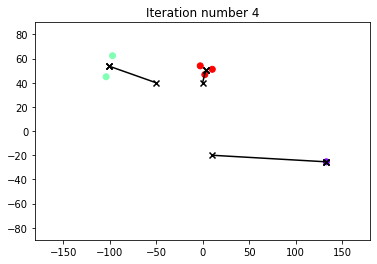

In [70]:
maxIters = 5
print('\nRunning K-Means clustering on example dataset...\n')
[centroids, idx] = kmeans(X, initialCentroids, maxIters)


### Choosing no. of clusters (Elbo method)
### $Plot\;cost\;function\;J\;vs\;K$